In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
sns.set_style("darkgrid")
#Fxns for data processing===========================
def red(time):
    '''
    This should eliminate the issue of the weird time jump about 2/3 of way through collection also that t=0 if 0 counts
    '''
    return np.arange(0,len(time))
def hours(secs,counts):
    import numpy
    hours=numpy.arange(0,secs[len(secs)-1]//3600+1)
    binned_counts=[0]*len(hours)
    for i in range(0,len(secs)):
        index=i//3600
        binned_counts[index]+=counts[i]
    return hours,binned_counts
def sqrtN(counts):
    return map(np.sqrt,counts)

# Fxns For Fitting=================================
def Exp(t,A,T,y0):
    return A*np.exp(-t/T)+y0
'''
def Exp_print(A,T,y0,A_err,T_err,y0_err):
    print("A:",A,"+/-",A_err)
    print("T:",T,"+/-",T_err)
    print("y0:",y0,"+/-",y0_err)
'''
def Exp_print(popt,perr):
    print("A: "+str(popt[0])+" +/-"+str(perr[0]))
    print("T: "+str(popt[1])+" +/-"+str(perr[1]))
    print("y0: "+str(popt[2])+" +/-"+str(perr[2]))
def sin(t,y0,A,omega):
    return (y0+A*np.sin(t*omega))
def sin_cos(t,y0,A1,A2,w1,w2):
    return y0+A1*np.sin(t*w1)+A2*np.cos(t*w2)
def sin2(t,y0,A1,A2,w1,w2):
    return y0+A1*np.sin(t*w1)+A2*np.sin(t*w2)
def sin2_print(popt,perr):
    print("y0: "+str(popt[0])+" +/- "+str(perr[0]))
    print("A1: "+str(popt[1])+" +/- "+str(perr[1]))
    print("A2: "+str(popt[2])+" +/- "+str(perr[2]))
    print("w1: "+str(popt[3])+" +/- "+str(perr[3]))
    print("w2: "+str(popt[4])+" +/- "+str(perr[4]))

# 400 mV Threshold

In [28]:
'''
Load data and cut out end where every value is 0 for several days. Also cut the good data short as the last hour is not a complete hour

'''
time_400, rate_400 = np.loadtxt('Corina_Ian_Thres400mVRate2015_11_10-13-24.txt', unpack=True)
#last_good_index=429359
#time_400=time_400[0:last_good_index]
#rate_400=rate_400[0:last_good_index]

last_hour_index =424800
time_400=time_400[0:last_hour_index]
rate_400=rate_400[0:last_hour_index]

y0: 18782.29323 +/- 17.7679630068
A1: 48.7643890258 +/- 25.141076379
A2: 58.5564156159 +/- 25.1985866984
w1: -0.317726866311 +/- 0.00777293724454
w2: -0.447720575291 +/- 0.00647604031939


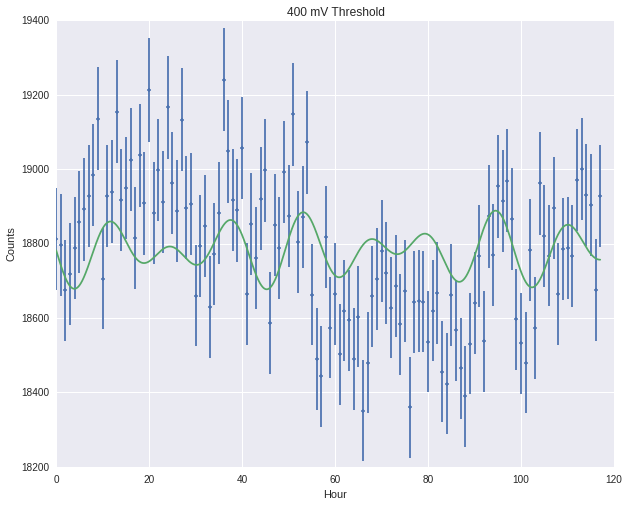

In [29]:
%matplotlib inline
hour_time,binned_counts=hours(red(time_400),rate_400)

func=sin2
popt, pcov = curve_fit(func, hour_time, binned_counts,sigma=sqrtN(binned_counts))
#print popt
x = np.linspace(0, hour_time[len(hour_time)-1], 5000)
y = func(x,*popt)

perr = np.sqrt(np.diag(pcov))
sin2_print(popt,perr)


plt.figure(figsize=(10,8))
plt.errorbar(hour_time,binned_counts,sqrtN(binned_counts),fmt='.')
plt.plot(x,y)
plt.title('400 mV Threshold')
sns.despine()
plt.ylabel('Counts')
plt.xlabel('Hour')


plt.show()

# .208 V Threshold
This file does not have anything weird with zeros

In [31]:
time_208, rate_208 = np.loadtxt('Corina_Ian_Thres208mVRate2015_11_05-13-33.txt', unpack=True)
last_hour_index=162000
time_208=time_208[0:last_hour_index]
rate_208=rate_208[0:last_hour_index]
hour_time,binned_counts=hours(red(time_208),rate_208)
time_208,data_208=np.loadtxt('Corina_Ian_Thres208mVIntervals2015_11_05-13-33.txt',unpack=True)


y0: 112221.713175 +/- 17.7679630068
A1: 1140.05824195 +/- 25.141076379
A2: 1073.50861394 +/- 25.1985866984
w1: 2.93706142525 +/- 0.00777293724454
w2: 3.34864044324 +/- 0.00647604031939


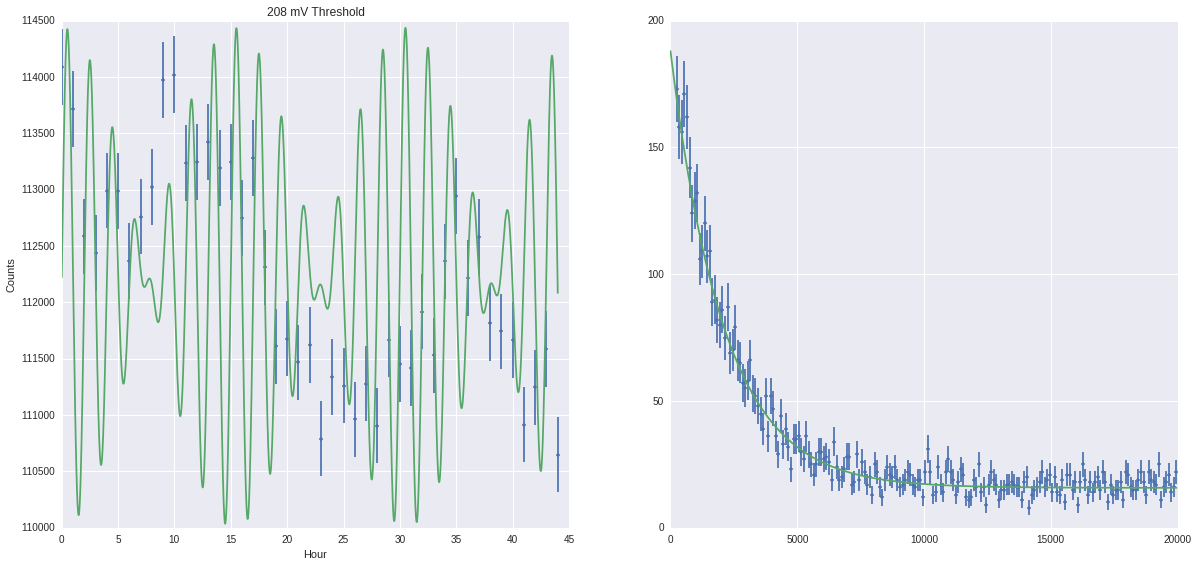

In [35]:
%matplotlib inline


func=sin2
rate_popt, rate_pcov = curve_fit(func, hour_time, binned_counts,sigma=sqrtN(binned_counts))
rate_x = np.linspace(0, hour_time[len(hour_time)-1], 5000)
rate_y = func(rate_x,*rate_popt)
rate_perr=np.sqrt(np.diag(rate_pcov))
sin2_print(rate_popt,perr)
counts_208,bin_edges_208=np.histogram(data_208[3:],200)
bin_centres_208 = (bin_edges_208[:-1] + bin_edges_208[1:])/2.
err_208 = map(np.sqrt,counts_208)

func=Exp
decay_popt, decay_pcov = curve_fit(Exp, bin_centres_208[1:], counts_208[1:],sigma=err_208[1:],p0=[150,1000,1])
decay_x = np.linspace(0, bin_centres_208[len(bin_centres_208)-1], 5000)
decay_y = Exp(decay_x,*decay_popt)


plt.figure(figsize=(20,20))
plt.subplot(221)
plt.errorbar(hour_time,binned_counts,sqrtN(binned_counts),fmt='.')
#plt.plot(rate_x,rate_y)
plt.xlabel('Hour')
plt.ylabel('Counts')
plt.title('208 mV Threshold')

plt.subplot(222)
plt.errorbar(bin_centres_208[2:], counts_208[2:], yerr=err_208[2:], fmt='.')
plt.plot(decay_x,decay_y)

plt.show()


# Jason Data

In [37]:
time_jason, rate_jason = np.loadtxt('JasonRate2014_11_11-13-21.txt', unpack=True)
last_hour_index=421200
time_jason=time_jason[0:last_hour_index]
rate_jason=rate_jason[0:last_hour_index]

y0: 41786.6204219 +/- 33.0638058104
A1: 31.2674550621 +/- 31.936564712
A2: -363.635730831 +/- 36.2119948088
w1: 0.878812289412 +/- 0.0152720549321
w2: -0.0417181614497 +/- 0.00204567539525


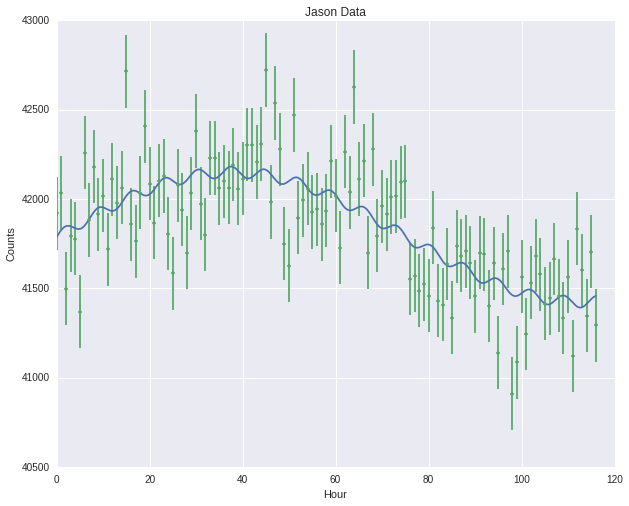

In [38]:
%matplotlib inline
hour_time,binned_counts=hours(red(time_jason),rate_jason)

func=sin2
popt, pcov = curve_fit(func, hour_time, binned_counts,sigma=sqrtN(binned_counts))
x = np.linspace(0, hour_time[len(hour_time)-1], 5000)
y = func(x,*popt)

perr = np.sqrt(np.diag(pcov))
sin2_print(popt,perr)


plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.errorbar(hour_time,binned_counts,sqrtN(binned_counts),fmt='.')
plt.title('Jason Data')
plt.ylabel('Counts')
plt.xlabel('Hour')
plt.show()